In [1]:
# Import Libraries
import pandas as pd
from scipy.io import arff
import numpy as np
import random
import os

# Load the ARFF file (same folder)
data, meta = arff.loadarff('file86eb92864fd.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Decode any byte strings (common in ARFF files)
for col in df.select_dtypes(['object']):
    df[col] = df[col].str.decode('utf-8')

# Save as CSV for convenience
df.to_csv('delays_zurich_transport.csv', index=False)

print("✅ ARFF file successfully converted to CSV and loaded!")
df.head(5)


✅ ARFF file successfully converted to CSV and loaded!


,delay,vehicle_type,line_number,direction,stop_id,weekday,time,temp,windspeed_max,windspeed_avg,precipitation,dew_point,humidity,hour,dayminute,hours,minutes,seconds
0,21.0,Tram,2,2,11229,3,460.0,6.6,0.9,0.2,0.0,5.7,94.0,7.0,460.0,7.0,40.0,0.0
1,47.0,Trolley,72,1,5793,2,1280.0,8.6,5.3,3.0,0.0,5.4,80.0,21.0,1280.0,21.0,20.0,0.0
2,-83.0,Bus,303,1,3428,1,40.0,4.1,3.2,1.6,0.0,3.2,94.0,0.0,40.0,0.0,40.0,0.0
3,-9.0,Tram,3,1,12026,4,670.0,8.9,2.3,1.8,0.0,5.7,80.0,11.0,670.0,11.0,10.0,0.0
4,633.0,Tram,4,2,6523,3,1100.0,7.5,3.8,2.5,0.0,3.3,75.0,18.0,1100.0,18.0,20.0,0.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check general info
print("=== Dataset Info ===")
df.info()

# Check for missing values (including ARFF-style ? or blank strings)
missing_counts = df.isna().sum()

# Also detect if "?" or "" are used instead of NaN
missing_question = (df == "?").sum(numeric_only=False)
missing_empty = (df == "").sum(numeric_only=False)

# Combine all missing indicators
total_missing = missing_counts + missing_question + missing_empty

print("\n=== Missing Values per Column (Including '?', blanks) ===")
print(total_missing[total_missing > 0].sort_values(ascending=False))


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27327 entries, 0 to 27326
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delay          27327 non-null  float64
 1   vehicle_type   27327 non-null  object 
 2   line_number    27327 non-null  object 
 3   direction      27327 non-null  object 
 4   stop_id        27327 non-null  object 
 5   weekday        27327 non-null  object 
 6   time           27327 non-null  float64
 7   temp           27327 non-null  float64
 8   windspeed_max  27327 non-null  float64
 9   windspeed_avg  27327 non-null  float64
 10  precipitation  27327 non-null  float64
 11  dew_point      27327 non-null  float64
 12  humidity       27327 non-null  float64
 13  hour           27327 non-null  float64
 14  dayminute      27327 non-null  float64
 15  hours          27327 non-null  float64
 16  minutes        27327 non-null  float64
 17  seconds        27327 non-null

In [3]:
# Quick numeric summary
print("\n=== Statistical Summary (Numeric Columns) ===")
print(df.select_dtypes(include=[np.number]).describe().T)


=== Statistical Summary (Numeric Columns) ===
                 count        mean         std     min    25%    50%     75%  \
delay          27327.0   54.976726  117.239522 -2430.0    0.0   29.0    77.0   
time           27327.0  834.440586  328.076599     0.0  570.0  840.0  1100.0   
temp           27327.0    7.284345    3.057282     0.7    4.9    7.5     9.4   
windspeed_max  27327.0    3.871797    2.132020     0.0    2.4    3.4     4.7   
windspeed_avg  27327.0    2.080957    1.000751     0.0    1.4    2.0     2.7   
precipitation  27327.0    0.027453    0.124024     0.0    0.0    0.0     0.0   
dew_point      27327.0    4.671116    2.744659    -1.2    2.6    5.1     7.0   
humidity       27327.0   83.926080    8.663855    54.0   79.0   85.0    91.0   
hour           27327.0   13.437479    5.466997     0.0    9.0   14.0    18.0   
dayminute      27327.0  834.112197  328.061321     0.0  570.0  840.0  1100.0   
hours          27327.0   13.437479    5.466997     0.0    9.0   14.0    1

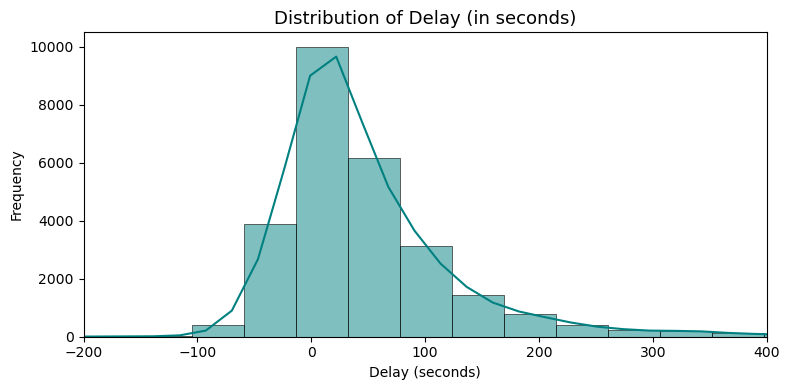

In [4]:
# Target variable distribution
plt.figure(figsize=(8,4))
sns.histplot(df['delay'], bins=100, kde=True, color='teal')
plt.title('Distribution of Delay (in seconds)', fontsize=13)
plt.xlabel('Delay (seconds)')
plt.ylabel('Frequency')
plt.xlim(-200, 400)  # zoom to main delay range
plt.tight_layout()
plt.show()

In [5]:
# Step 3: Handle Missing or Placeholder Values in 'line_number'

# Count both true NaN and '?' placeholders
missing_before = ((df['line_number'].isnull()) | (df['line_number'] == '?')).sum()
print(f"Missing or placeholder ('?') values before replacement: {missing_before}")

# Replace '?' and NaN with a consistent placeholder 'Unknown'
df['line_number'] = df['line_number'].replace('?', np.nan)
df['line_number'] = df['line_number'].fillna('Unknown')

# Double-check after replacement
missing_after = ((df['line_number'].isnull()) | (df['line_number'] == '?')).sum()
print(f"Missing or placeholder values after replacement: {missing_after}")

# Display frequency of categories (top 10)
print("\n Updated 'line_number' value counts (Top 18):")
print(df['line_number'].value_counts().head(18))

Missing or placeholder ('?') values before replacement: 657
Missing or placeholder values after replacement: 0

 Updated 'line_number' value counts (Top 18):
line_number
33         1255
9          1190
11         1180
7          1162
31         1128
13         1086
32         1032
80          991
2           929
4           898
14          890
72          783
75          779
10          772
3           765
46          709
17          705
Unknown     657
Name: count, dtype: int64


In [6]:
# Identify categorical & numerical columns
categorical_cols = ['vehicle_type', 'line_number', 'direction', 'stop_id', 'weekday']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['delay']]
target = 'delay'

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print("Target:", target)

Categorical columns: ['vehicle_type', 'line_number', 'direction', 'stop_id', 'weekday']
Numerical columns: ['time', 'temp', 'windspeed_max', 'windspeed_avg', 'precipitation', 'dew_point', 'humidity', 'hour', 'dayminute', 'hours', 'minutes', 'seconds']
Target: delay


In [7]:
# Remove Duplicated instances
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

Removed 2 duplicate rows.


In [8]:
# defice quantile
Q1 = df['delay'].quantile(0.25)
Q3 = df['delay'].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['delay'] < lower_limit) | (df['delay'] > upper_limit)]
print(f"Outliers detected: {len(outliers)}")

# Option 1 (Recommended): Cap outliers instead of removing
df['delay'] = np.where(df['delay'] > upper_limit, upper_limit,
                np.where(df['delay'] < lower_limit, lower_limit, df['delay']))


Outliers detected: 1829


In [9]:
# Cyclic encoding (time-related)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'].astype(int) / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'].astype(int) / 7)

# Add new cyclic features to numeric columns
numerical_cols += ['hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos']

In [10]:
# --- Feature Engineering ---

# 1. Peak hour flag
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or
                                      (16 <= x <= 19) else 0)

# 2. Weekend flag
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in ['6', '7'] else 0)

# 3. Average delay by line
df['avg_delay_by_line'] = df.groupby('line_number')['delay'].transform('mean')

# 4. Average delay by vehicle type
df['avg_delay_by_vehicle_type'] = df.groupby('vehicle_type')['delay'].transform('mean')

# 5. Stop popularity (frequency)
df['stop_popularity'] = df.groupby('stop_id')['stop_id'].transform('count')

# 
df['hour_bucket'] = pd.cut(df['hour'], bins=[0,6,12,18,24], 
                           labels=['Night','Morning','Afternoon','Evening'], right=False)
df['is_high_delay_line'] = (df['avg_delay_by_line'] > df['delay'].mean()).astype(int)
df['is_major_stop'] = (df['stop_popularity'] > 
                       df['stop_popularity'].quantile(0.75)).astype(int)

categorical_cols += ['hour_bucket']
numerical_cols += ['is_peak_hour', 'is_weekend','avg_delay_by_line', 
                   'avg_delay_by_vehicle_type','stop_popularity', 'is_high_delay_line', 
                   'is_major_stop']

In [11]:
# Convert numerical columns into real numeric type
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in categorical_cols:
    df[col] = df[col].astype(str)

In [12]:
# --- Save CatBoost-ready ---
catboost_ready = df[categorical_cols + numerical_cols + [target]]
catboost_ready.to_csv("delays_zurich_catboost_ready.csv", index=False)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# --- Define high- and low-cardinality categorical columns ---
high_card_cols = ['stop_id']  # Keep as single column in CSV
low_card_cols = [col for col in categorical_cols if col not in high_card_cols]

# --- Prepare numeric features ---
numeric_features = numerical_cols.copy()  # already prepared

# --- Combine numeric + low-card categorical for initial CSV ---
mlp_df = pd.concat([
    df[numeric_features].reset_index(drop=True),
    df[low_card_cols].reset_index(drop=True),
    df[high_card_cols].reset_index(drop=True),  # keep stop_id as a single column
    df[target].reset_index(drop=True)
], axis=1)

# --- Scale numeric columns (0-1) ---
scaler = MinMaxScaler()
mlp_df[numeric_features] = scaler.fit_transform(mlp_df[numeric_features])


In [14]:
# --- Save MLP-ready ---
mlp_df.to_csv("delays_zurich_mlp_ready.csv", index=False)

In [15]:
from sklearn.model_selection import train_test_split

# Features and target
X_catboost = catboost_ready.drop(columns=['delay'])
y_catboost = catboost_ready['delay']

# Train-test split (e.g., 80% train, 20% test)
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_catboost, y_catboost, test_size=0.2, random_state=42)

print("CatBoost train shape:", X_train_cb.shape)
print("CatBoost test shape:", X_test_cb.shape)

# --- Train-test split ---
X = mlp_df.drop(columns=[target])
y = mlp_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Before encoding - X_train shape:", X_train.shape)
print("Before encoding - X_test shape:", X_test.shape)

# --- Dynamic one-hot encoding for low-cardinality + stop_id ---
categorical_features = low_card_cols + high_card_cols  # include stop_id here

# Create OneHotEncoder with handle_unknown='ignore'
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('cat', ohe, categorical_features)],
    remainder='passthrough'  # keep numeric features
)

# Fit on training data only
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

print("After encoding - X_train shape:", X_train_enc.shape)
print("After encoding - X_test shape:", X_test_enc.shape)

CatBoost train shape: (21860, 29)
CatBoost test shape: (5465, 29)
Before encoding - X_train shape: (21860, 29)
Before encoding - X_test shape: (5465, 29)
After encoding - X_train shape: (21860, 1588)
After encoding - X_test shape: (5465, 1588)


0:	learn: 63.7840138	test: 63.3436410	best: 63.3436410 (0)	total: 343ms	remaining: 11m 26s
200:	learn: 39.1261236	test: 40.9621397	best: 40.9462833 (190)	total: 43.4s	remaining: 6m 28s
400:	learn: 37.5191936	test: 41.0107485	best: 40.9207398 (254)	total: 1m 27s	remaining: 5m 49s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 40.92073976
bestIteration = 254

Shrink model to first 255 iterations.
Train R²: 0.654, Test R²: 0.597
CatBoost Test RMSE: 40.921
CatBoost Test R2: 0.597

Top 10 Features by Importance:
                 feature  importance
37   rolling_delay_mean2   55.218441
35  rolling_delay_median   37.117945
36     rolling_delay_std    2.398260
3                stop_id    1.040956
6           weekday_hour    0.523123
33  avg_delay_by_weekday    0.470791
4                weekday    0.326173
28       stop_popularity    0.281043
9                   temp    0.259423
13             dew_point    0.218355


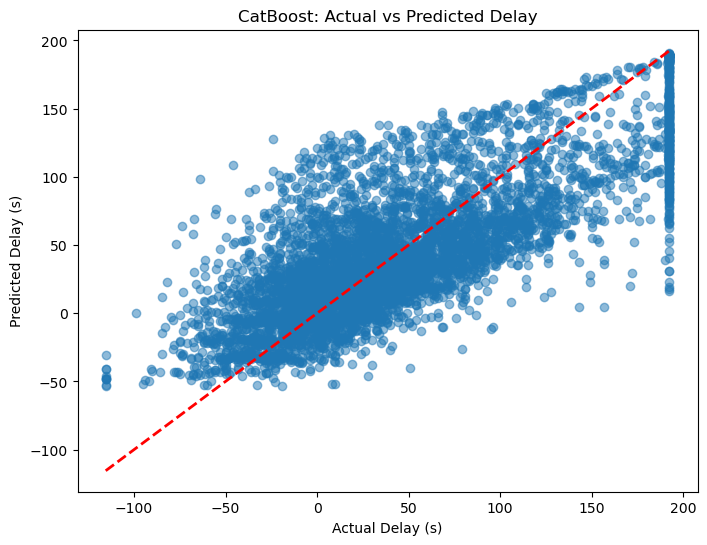

In [16]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Feature Engineering ---
# Create interaction categorical features
df['weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour_bucket'].astype(str)
df['vehicle_line'] = df['vehicle_type'].astype(str) + "_" + df['line_number'].astype(str)

# Make sure categorical_cols exists
categorical_cols = categorical_cols if 'categorical_cols' in globals() else []
for new_col in ['weekday_hour', 'vehicle_line']:
    if new_col not in categorical_cols:
        categorical_cols.append(new_col)

# Create aggregated numeric features
df['avg_delay_by_route'] = df.groupby('line_number')['delay'].transform('mean')
df['avg_delay_by_hour'] = df.groupby('hour_bucket')['delay'].transform('mean')
df['avg_delay_by_weekday'] = df.groupby('weekday')['delay'].transform('mean')
df['avg_delay_by_vehicle'] = df.groupby('vehicle_type')['delay'].transform('mean')

# Create lag and rolling features
df = df.sort_values(['line_number', 'time', 'temp'])

df['rolling_delay_median'] = df.groupby('line_number')['delay'].rolling(2).median().reset_index(0, drop=True)

# Rolling standard deviation
df['rolling_delay_std'] = df.groupby('line_number')['delay'].rolling(2).std().reset_index(0, drop=True)

df['rolling_delay_mean2'] = df.groupby('line_number')['delay'].rolling(2).mean().reset_index(0, drop=True)

# Make sure numerical_cols exists
numerical_cols = numerical_cols if 'numerical_cols' in globals() else []
for new_col in ['avg_delay_by_route', 'avg_delay_by_hour', 'avg_delay_by_weekday', 
                'avg_delay_by_vehicle', 'rolling_delay_median', 'rolling_delay_std', 'rolling_delay_mean2']:
    if new_col not in numerical_cols:
        numerical_cols.append(new_col)


# Remove duplicates (just in case)
categorical_cols = list(dict.fromkeys(categorical_cols))
numerical_cols = list(dict.fromkeys(numerical_cols))


# --- Step 2: Prepare CatBoost Dataset ---
# Combine features
X_catboost = df[categorical_cols + numerical_cols].copy()
# Remove duplicate columns in the DataFrame
X_catboost = X_catboost.loc[:, ~X_catboost.columns.duplicated()]

y_catboost = df[target].copy()

# Split data
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_catboost, y_catboost, test_size=0.2, random_state=42
)

# Filter categorical features to those that exist in X_train
cat_features_in_data = [col for col in categorical_cols if col in X_train_cb.columns]
for col in cat_features_in_data:
    X_catboost[col] = X_catboost[col].astype(str)
    X_train_cb[col] = X_train_cb[col].astype(str)
    X_test_cb[col] = X_test_cb[col].astype(str)

# Create CatBoost Pools
train_pool = Pool(X_train_cb, y_train_cb, cat_features=cat_features_in_data)
test_pool = Pool(X_test_cb, y_test_cb, cat_features=cat_features_in_data)


# --- Step 3: Train CatBoost ---
model_cb = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=3,
    subsample=0.9,
    colsample_bylevel=0.9,
    random_strength=1.2,
    border_count=254,
    grow_policy='Lossguide',
    eval_metric='RMSE',
    random_seed=42,
    verbose=200,
    early_stopping_rounds=150,
    task_type="CPU"
)

model_cb.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True
)

# --- Step 3a: Train/Test R² Comparison ---
# Predict on training set
y_train_pred = model_cb.predict(X_train_cb)
r2_train = r2_score(y_train_cb, y_train_pred)

# Predict on test set
y_test_pred = model_cb.predict(X_test_cb)
r2_test = r2_score(y_test_cb, y_test_pred)

print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")

# --- Step 4: Evaluate ---
y_pred_cb = model_cb.predict(X_test_cb)
mse = mean_squared_error(y_test_cb, y_pred_cb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_cb, y_pred_cb)

print(f"CatBoost Test RMSE: {rmse:.3f}")
print(f"CatBoost Test R2: {r2:.3f}")

# --- Step 5: Feature Importance ---
feature_importances = pd.DataFrame({
    'feature': X_train_cb.columns,
    'importance': model_cb.get_feature_importance()
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(feature_importances.head(10))

# --- Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(y_test_cb, y_pred_cb, alpha=0.5)
plt.plot([y_test_cb.min(), y_test_cb.max()],
         [y_test_cb.min(), y_test_cb.max()],
         'r--', lw=2)
plt.xlabel("Actual Delay (s)")
plt.ylabel("Predicted Delay (s)")
plt.title("CatBoost: Actual vs Predicted Delay")
plt.show()


C:\Users\Chee Siong\AppData\Local\Temp\ipykernel_3632\756140894.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


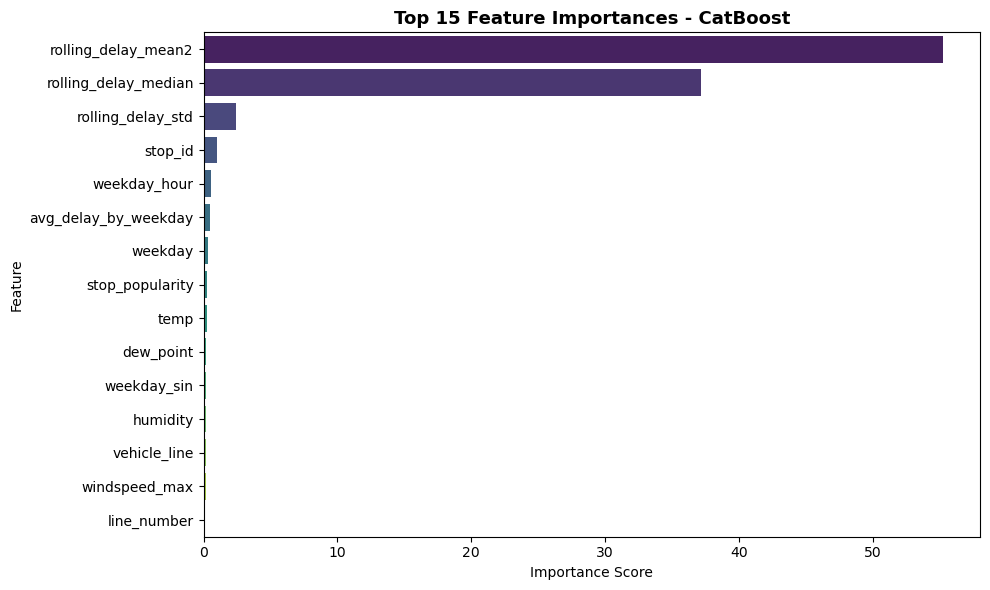

In [17]:
#  --- VISUALIZATION SECTION 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- FEATURE IMPORTANCE ---
feature_importances = pd.DataFrame({
    'feature': X_train_cb.columns,
    'importance': model_cb.get_feature_importance()
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importances.head(15),
    x='importance', y='feature', palette='viridis', dodge=False
)
plt.title("Top 15 Feature Importances - CatBoost", fontsize=13, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Fold 1: R² = 0.585, RMSE = 38.854
Fold 2: R² = 0.595, RMSE = 45.039
Fold 3: R² = 0.604, RMSE = 40.130
Fold 4: R² = 0.592, RMSE = 39.952
Fold 5: R² = 0.582, RMSE = 43.068

Cross-Validation Results:
Mean R²: 0.591 ± 0.008
Mean RMSE: 41.409 ± 2.290


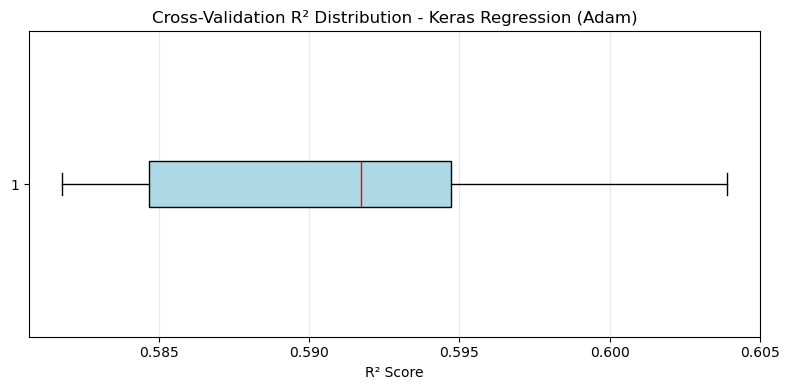

In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- TimeSeriesSplit CV for CatBoost ---
tscv = TimeSeriesSplit(n_splits=5)

r2_scores = []
rmse_scores = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_catboost), 1):
    X_train_cv, X_val_cv = X_catboost.iloc[train_idx], X_catboost.iloc[val_idx]
    y_train_cv, y_val_cv = y_catboost.iloc[train_idx], y_catboost.iloc[val_idx]
    
    # Create Pool with categorical features
    train_pool_cv = Pool(X_train_cv, y_train_cv, cat_features=cat_features_in_data)
    val_pool_cv = Pool(X_val_cv, y_val_cv, cat_features=cat_features_in_data)
    
    # Initialize a fresh model for this fold
    model_cv = CatBoostRegressor(
        iterations=200,
        learning_rate=0.03,
        depth=8,
        l2_leaf_reg=3,
        subsample=0.9,
        colsample_bylevel=0.9,
        random_strength=1.2,
        border_count=254,
        grow_policy='Lossguide',
        eval_metric='RMSE',
        random_seed=42,
        verbose=0,
        early_stopping_rounds=150,
        task_type="CPU",
        thread_count=-1  
    )
    
    # Train on fold
    model_cv.fit(train_pool_cv, eval_set=val_pool_cv, use_best_model=True)
    
    # Predict on validation fold
    y_pred_cv = model_cv.predict(X_val_cv)
    
    # Metrics
    r2_fold = r2_score(y_val_cv, y_pred_cv)
    rmse_fold = np.sqrt(mean_squared_error(y_val_cv, y_pred_cv))
    
    r2_scores.append(r2_fold)
    rmse_scores.append(rmse_fold)
    
    print(f"Fold {fold}: R² = {r2_fold:.3f}, RMSE = {rmse_fold:.3f}")

print("\nCross-Validation Results:")
print(f"Mean R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

# --- Visualization ---
plt.figure(figsize=(8,4))
plt.boxplot(r2_scores, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title("Cross-Validation R² Distribution - Keras Regression (Adam)")
plt.xlabel("R² Score")
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


Epoch 1/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2254.0518 - mae: 35.7568 - mse: 2254.0518 - val_loss: 1726.8815 - val_mae: 31.9871 - val_mse: 1726.8815
Epoch 2/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1683.0721 - mae: 31.4485 - mse: 1683.0721 - val_loss: 1729.7085 - val_mae: 31.9252 - val_mse: 1729.7085
Epoch 3/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1606.9865 - mae: 30.5975 - mse: 1606.9865 - val_loss: 1711.5806 - val_mae: 31.7151 - val_mse: 1711.5806
Epoch 4/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1541.0828 - mae: 29.8663 - mse: 1541.0828 - val_loss: 1745.5614 - val_mae: 31.5808 - val_mse: 1745.5614
Epoch 5/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1470.3948 - mae: 29.0297 - mse: 1470.3948 - val_loss: 1767.4708 - val_mae: 31.7322 - val_mse: 1767.4708
Epoch 6/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1383.2708 - mae: 27.9099 - mse: 1383.2708 - val_loss: 1785.5469 - val_mae: 31.4730 - val_mse: 1785.5469
Epoch 7/10

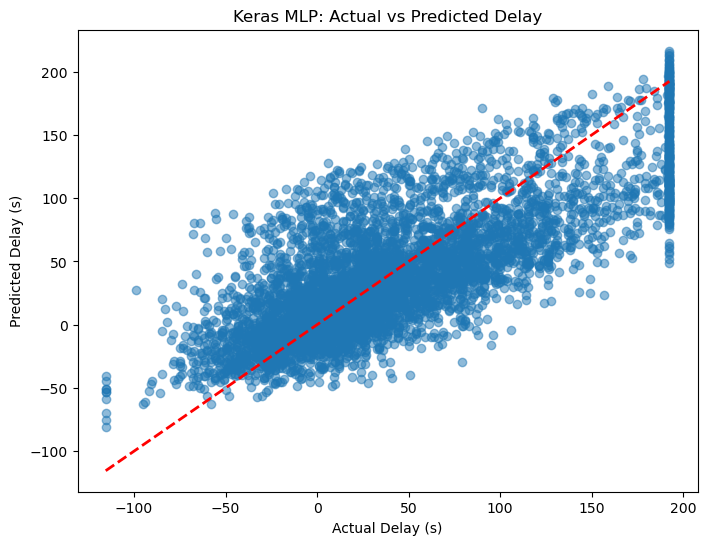

In [19]:
#MLP Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Add enhanced categorical interactions ---
df['weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour_bucket'].astype(str)
df['vehicle_line'] = df['vehicle_type'].astype(str) + "_" + df['line_number'].astype(str)

df['avg_delay_by_route'] = df.groupby('line_number')['delay'].transform('mean')
df['avg_delay_by_hour'] = df.groupby('hour_bucket')['delay'].transform('mean')
df['avg_delay_by_weekday'] = df.groupby('weekday')['delay'].transform('mean')
df['avg_delay_by_vehicle'] = df.groupby('vehicle_type')['delay'].transform('mean')

for new_col in ['weekday_hour', 'vehicle_line']:
    if new_col not in categorical_cols:
        categorical_cols.append(new_col)

df = df.sort_values(['line_number', 'time', 'temp'])
df['rolling_delay_mean2'] = df.groupby('line_number')['delay'].rolling(2).mean().reset_index(0, drop=True)
df.fillna(0, inplace=True)
# Rolling standard deviation
df['rolling_delay_std'] = df.groupby('line_number')['delay'].rolling(2).std().reset_index(0, drop=True)

df['rolling_delay_mean2'] = df.groupby('line_number')['delay'].rolling(2).mean().reset_index(0, drop=True)

# Make sure numerical_cols exists
numerical_cols = numerical_cols if 'numerical_cols' in globals() else []
for new_col in ['avg_delay_by_route', 'avg_delay_by_hour', 'avg_delay_by_weekday', 
                'avg_delay_by_vehicle', 'rolling_delay_median', 'rolling_delay_std', 'rolling_delay_mean2']:
    if new_col not in numerical_cols:
        numerical_cols.append(new_col)

numerical_cols = [c for c in numerical_cols if c in df.columns]
categorical_cols = [c for c in categorical_cols if c in df.columns]

# --- Split data ---
X = df.drop(columns=['delay'])
y = df['delay']
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Preprocessing ---
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='drop'
)

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Convert sparse matrices to dense if needed
X_train_enc = X_train_enc.toarray() if not isinstance(X_train_enc, np.ndarray) else X_train_enc
X_test_enc = X_test_enc.toarray() if not isinstance(X_test_enc, np.ndarray) else X_test_enc

# --- Define the MLP Regression Model ---
model_reg = keras.Sequential([
    layers.Input(shape=(X_train_enc.shape[1],)),  # Input size = # of features
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  # Linear output for regression
])

# --- Compile ---
model_reg.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',   # Mean Squared Error for regression
    metrics=['mae', 'mse']  # Monitor MAE and MSE
)

# --- Train ---
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_reg.fit(
    X_train_enc, y_train,
    validation_data=(X_test_enc, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate ---
y_pred_keras = model_reg.predict(X_test_enc).flatten()
rmse_keras = np.sqrt(mean_squared_error(y_test, y_pred_keras))
r2_keras = r2_score(y_test, y_pred_keras)

print(f"\nKeras MLP Regression Results:")
print(f"RMSE: {rmse_keras:.3f}")
print(f"R²: {r2_keras:.3f}")

# --- Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_keras, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Delay (s)")
plt.ylabel("Predicted Delay (s)")
plt.title("Keras MLP: Actual vs Predicted Delay")
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --- Load dataset ---

X = df.drop("delay", axis=1)
y = df["delay"]

# --- Identify categorical columns ---
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# --- Ordinal encode high-cardinality categories ---
if cat_cols:
    encoder = OrdinalEncoder()
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

# --- Fill missing values ---
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Define MLP regression model ---
def create_regression_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # regression output
    ])
    model.compile(optimizer=keras.optimizers.Adam(0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# --- Train/Test Evaluation ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = create_regression_model(X_scaled.shape[1])
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=50, batch_size=32, verbose=0)

y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

print("=== Train/Test Evaluation ===")
print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}, RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Test  R²: {r2_score(y_test, y_test_pred):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

# --- 5-Fold Cross-Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores, rmse_scores = [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled, y), start=1):
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    model = create_regression_model(X_scaled.shape[1])
    model.fit(X_train_fold, y_train_fold,
              validation_data=(X_test_fold, y_test_fold),
              epochs=50, batch_size=32, verbose=0)

    y_pred_fold = model.predict(X_test_fold).flatten()
    r2_scores.append(r2_score(y_test_fold, y_pred_fold))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_fold, y_pred_fold)))
    print(f"Fold {fold} R²: {r2_scores[-1]:.4f}, RMSE: {rmse_scores[-1]:.4f}")

print("\n=== Cross-Validation Results ===")
print(f"Mean R² : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
=== Train/Test Evaluation ===
Train R²: 0.569, RMSE: 42.588
Test  R²: 0.542, RMSE: 43.592
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 1 R²: 0.5559, RMSE: 42.9457
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2 R²: 0.5649, RMSE: 43.2165
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Fold 3 R²: 0.5552, RMSE: 42.6704
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 4 R²: 0.5464, RMSE: 43.8206
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 5 R²: 0.5557, RMSE: 43.3383

=== Cross-Validation Results ===
Mean R² : 0.5556 ± 0.0058
Mean RMSE: 43.1983 ± 0.3872


In [21]:
# --- DROP-COLUMN FEATURE IMPORTANCE FOR KERAS MLP REGRESSOR ---

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

def drop_column_importance_regression(model, X_scaled, y, feature_names, metric=r2_score):
    """
    Computes feature importance for a Keras MLP regressor using the drop-column method.
    
    Args:
        model: trained Keras model
        X_scaled: scaled features (numpy array)
        y: target values (array-like)
        feature_names: list of feature names (must match columns in X_scaled)
        metric: scoring function (default r2_score)
    
    Returns:
        pd.DataFrame: feature importance (sorted by drop in metric)
    """
    baseline_pred = model.predict(X_scaled).flatten()
    baseline_score = metric(y, baseline_pred)
    importances = []

    for i, col in enumerate(feature_names):
        X_temp = X_scaled.copy()
        X_temp[:, i] = 0  # zero out one feature at a time
        y_pred_temp = model.predict(X_temp).flatten()
        score = metric(y, y_pred_temp)
        importance = baseline_score - score
        importances.append(importance)
        print(f"Feature: {col}, Drop in R2: {importance:.6f}")

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)

    return importance_df

# --- GET FEATURE NAMES AFTER PREPROCESSING ---
# For simplicity: combine original categorical and numerical column names
# If you have one-hot encoded categorical columns, you can just use the original names
feature_names = list(categorical_cols) + list(numerical_cols)

# --- COMPUTE FEATURE IMPORTANCE ---
importance_df = drop_column_importance_regression(
    model_reg,
    X_test_enc,  # preprocessed test features (NumPy array)
    y_test.values,
    feature_names
)

print("\nTop 10 Features by Drop in R²:")
print(importance_df.head(10))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Feature: vehicle_type, Drop in R2: 0.003003
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: line_number, Drop in R2: 0.002483
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: direction, Drop in R2: 0.000149
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: stop_id, Drop in R2: -0.000029
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: weekday, Drop in R2: 0.000063
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: hour_bucket, Drop in R2: -0.000000
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: weekday_hour, Drop in R2: 0.000048
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: vehicle_line, Drop in R2: 0.000085
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: time, Drop in R2: -0.000011
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: temp, Drop in R2: 0.000077
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Feature: windspeed_max, Drop in R2: -0.000002
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st